In [1]:
import yfinance as yf
import datetime as dt
import pandas as pd
import numpy as np
from numpy import arange
import matplotlib.pyplot as plt
from pandas import read_csv
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import RandomizedSearchCV
import mplfinance as mpf
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
import yfinance as yahooFinance
 
 
gold_price = yahooFinance.Ticker("GC=F")

In [3]:
Data = gold_price.history(period="2y")

In [4]:
data = Data.resample('D').mean()
data

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2020-03-23,1505.300049,1567.000000,1490.199951,1567.000000,51.0,0.0,0.0
2020-03-24,1592.699951,1685.500000,1592.699951,1660.199951,442.0,0.0,0.0
2020-03-25,1676.500000,1676.500000,1631.099976,1632.300049,476.0,0.0,0.0
2020-03-26,1660.500000,1660.500000,1650.099976,1650.099976,3.0,0.0,0.0
2020-03-27,1623.900024,1623.900024,1623.900024,1623.900024,100638.0,0.0,0.0
...,...,...,...,...,...,...,...
2022-03-18,1934.500000,1939.300049,1928.199951,1928.199951,28.0,0.0,0.0
2022-03-19,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2022-03-20,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
price= data.interpolate(method = 'linear')
price.head(7)

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2020-03-23,1505.300049,1567.000000,1490.199951,1567.000000,51.0,0.0,0.0
2020-03-24,1592.699951,1685.500000,1592.699951,1660.199951,442.0,0.0,0.0
2020-03-25,1676.500000,1676.500000,1631.099976,1632.300049,476.0,0.0,0.0
2020-03-26,1660.500000,1660.500000,1650.099976,1650.099976,3.0,0.0,0.0
2020-03-27,1623.900024,1623.900024,1623.900024,1623.900024,100638.0,0.0,0.0
2020-03-28,1629.666667,1633.533366,1618.333333,1623.266683,72555.0,0.0,0.0
2020-03-29,1635.433309,1643.166707,1612.766642,1622.633341,44472.0,0.0,0.0


In [6]:
df = pd.read_csv('Live Price Gold.csv')

In [7]:
df.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Volume', 'Dividends',
       'Stock Splits'],
      dtype='object')

In [8]:
df['Date'] = pd.to_datetime(df['Date'])

In [9]:
all_corr = df.corr().abs()['Close'].sort_values(ascending = False)
all_corr

Close           1.000000
Low             0.991746
High            0.989494
Open            0.979687
Volume          0.051740
Dividends            NaN
Stock Splits         NaN
Name: Close, dtype: float64

In [10]:
df.drop(columns=['Dividends','Stock Splits'],inplace=True)

In [11]:
corr_drop = all_corr[all_corr < 0.35]
corr_drop

Volume    0.05174
Name: Close, dtype: float64

In [12]:
to_drop = list(corr_drop.index)
df2 = df.drop(to_drop, axis = 1)
df2.head()

,Date,Open,High,Low,Close
0,2020-03-20,1483.500000,1484.000000,1483.500000,1484.000000
1,2020-03-21,1490.766683,1511.666667,1485.733317,1511.666667
2,2020-03-22,1498.033366,1539.333333,1487.966634,1539.333333
3,2020-03-23,1505.300049,1567.000000,1490.199951,1567.000000
4,2020-03-24,1592.699951,1685.500000,1592.699951,1660.199951


In [13]:
df2 = df2.set_index("Date")
df2

,Open,High,Low,Close
Date,,,,
2020-03-20,1483.500000,1484.000000,1483.500000,1484.000000
2020-03-21,1490.766683,1511.666667,1485.733317,1511.666667
2020-03-22,1498.033366,1539.333333,1487.966634,1539.333333
2020-03-23,1505.300049,1567.000000,1490.199951,1567.000000
2020-03-24,1592.699951,1685.500000,1592.699951,1660.199951
...,...,...,...,...
2022-03-14,1976.500000,1977.699951,1959.599976,1959.599976
2022-03-15,1939.800049,1939.900024,1910.699951,1928.500000
2022-03-16,1922.400024,1922.400024,1907.199951,1908.000000


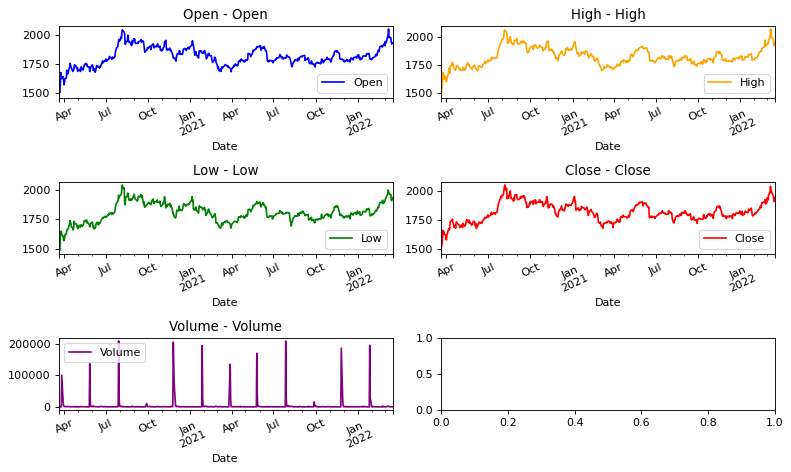

In [14]:
import matplotlib.pyplot as plt

titles = ['Open', 'High', 'Low', 'Close', 'Volume' ]
feature_keys = ['Open', 'High', 'Low', 'Close', 'Volume']

colors = [ "blue","orange","green","red","purple"]

date_time_key = "Date"

def show_raw_visualization(data):
    time_data = data[date_time_key]
    fig, axes = plt.subplots(
        nrows=3, ncols=2, figsize=(10,6), dpi=80, facecolor="w", edgecolor="k"
    )
    for i in range(len(feature_keys)):
        key = feature_keys[i]
        c = colors[i % (len(colors))]
        t_data = data[key]
        t_data.index = time_data
        t_data.head()
        ax = t_data.plot(
            ax=axes[i // 2, i % 2],
            color=c,
            title="{} - {}".format(titles[i], key),
            rot=25,
        )
        ax.legend([titles[i]])
    plt.tight_layout()


show_raw_visualization(df)



In [15]:
from sklearn.model_selection import TimeSeriesSplit

tss = TimeSeriesSplit(n_splits = 3)
X = df2.drop(['Close'], axis = 1)
y = df2['Close']

In [16]:
for train_index, test_index in tss.split(X):
    X_train, X_test = X.iloc[train_index, :], X.iloc[test_index,:]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

In [67]:
X_test.shape,X_train.shape

((182, 3), (547, 3))

In [69]:
y_test.shape, y_train.shape, y_pred.shape

((182,), (547,), (182,))

# LGBM Regressor with Repeated stratified K fold

In [17]:
from lightgbm import LGBMRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold

model = LGBMRegressor()
cv = RepeatedKFold(n_splits=10, n_repeats=1, random_state=1)

In [18]:
n_scores = cross_val_score(model, X_train, y_train, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1, error_score='raise')

from numpy import mean
from numpy import std
print('Negative MAE: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))

Negative MAE: -7.771 (1.769)


In [19]:
model.fit(X_train, y_train)
y_pred= model.predict(X_test)
from sklearn.metrics import mean_absolute_error
print("The Mean Absolute error is: ", mean_absolute_error(y_test, y_pred))

The Mean Absolute error is:  5.003462978762876


In [20]:
model.score(X_test, y_test)

0.9839769372629056

In [21]:
model.score(X_train, y_train)

0.9814852307593177

In [22]:
result = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
result

,Actual,Predicted
Date,,
2021-09-18,1753.533366,1751.357325
2021-09-19,1757.666707,1759.133766
2021-09-20,1761.800049,1760.078975
2021-09-21,1776.000000,1773.730026
2021-09-22,1776.699951,1776.488218
...,...,...
2022-03-14,1959.599976,1992.472904
2022-03-15,1928.500000,1924.268539
2022-03-16,1908.000000,1914.344368


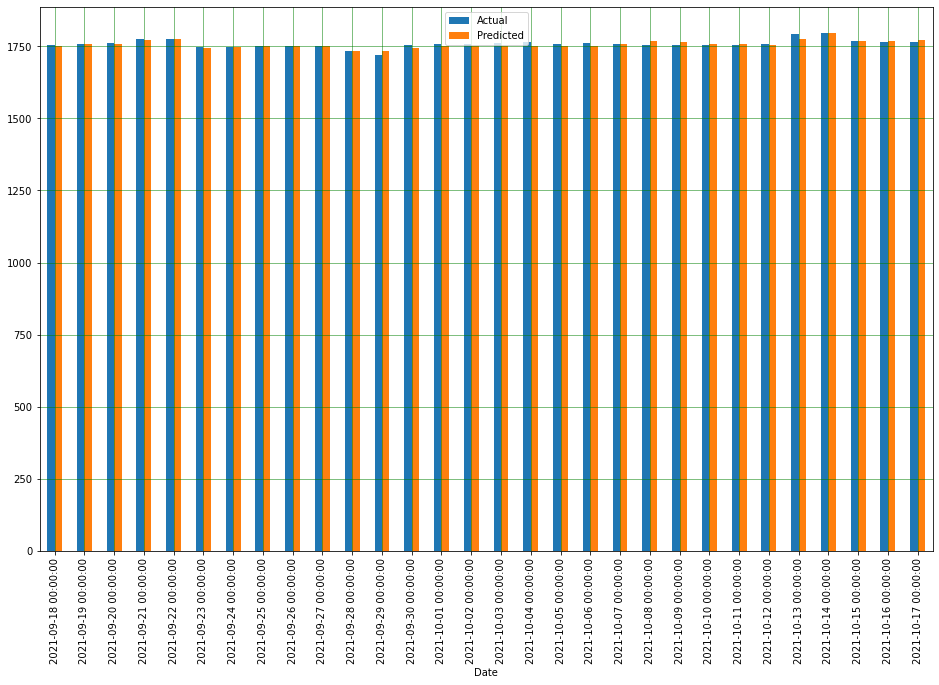

In [23]:
result_plot = result.head(30)
result_plot.plot(kind='bar',figsize=(16,10))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()